In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7) #set figsize for all

### Read data and concat

Two sources:
* 1969-1988: Center for Disease Control from Jake Vpd
* 1994-2014: Two sets from FiveThirtyEight
  - Center for Disease Control (1994-2003)
  - Social Security (2004-2014)

In [2]:
# First set
vpd = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv').groupby(['year', 'month', 'day'])['births'].sum().reset_index()
vpd['day'] = vpd['day'].astype(int)
# need to remove a few invalid dates
vpd = vpd[~((vpd['month']==2) & (vpd['day']>29))] #remove any >29 days for February
vpd = vpd[~((vpd['month'].isin([4, 6, 9, 11])) & (vpd['day']>30))] #remove any >30 days when inappropriate
vpd = vpd[vpd['day'] < 32] #remove any dates > 31

# Second set
fte_cdc = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv')
fte_ss = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv')
fte = pd.concat([fte_cdc, fte_ss[fte_ss['year'] > 2003]], axis=0) #concat two 538 sets
fte = fte.drop(columns=['day_of_week']).rename(columns = {'date_of_month':'day'}) #rename to get same column names

# Concat
birth_df = pd.concat([vpd, fte], axis=0)

In [28]:
birth_df.head()

,year,month,day,births,date
0,1969,1,1,8486,2012-01-01
1,1969,1,2,9002,2012-01-02
2,1969,1,3,9542,2012-01-03
3,1969,1,4,8960,2012-01-04
4,1969,1,5,8390,2012-01-05


### Plot birthdays

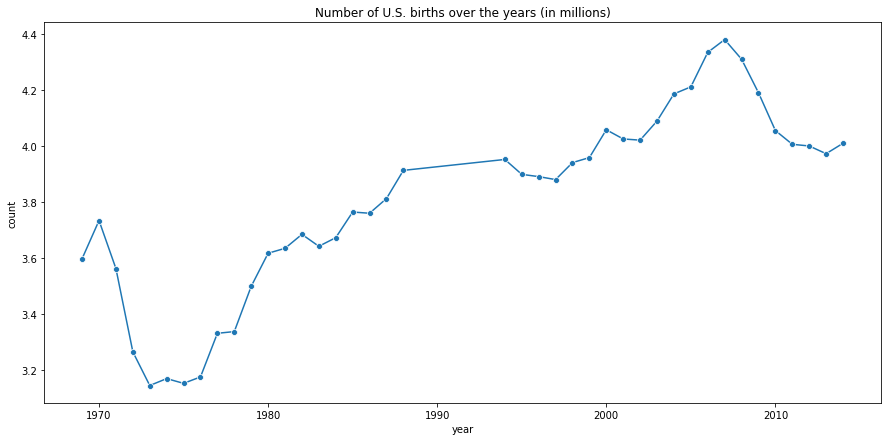

In [4]:
#Plot
data = birth_df.groupby('year')['births'].sum().reset_index(name='count')

ax = sns.lineplot(x=data['year'], y=data['count']/np.power(10, 6), marker='o')
ax.set_title('Number of U.S. births over the years (in millions)')
plt.show()

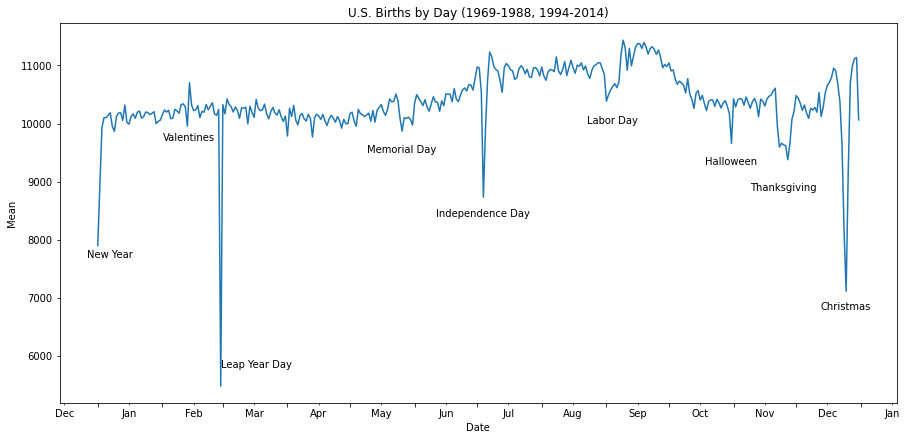

In [73]:
# Get date (pick leap year as placeholder)
birth_df['date'] = pd.to_datetime('2012-'+birth_df['month'].astype(str)+'-'+birth_df['day'].astype(str))
data = birth_df.groupby('date')['births'].mean().reset_index(name='mean').sort_values('date')

# Plot
ax = sns.lineplot(x=data['date'], y=data['mean'])
ax.set(title='U.S. Births by Day (1969-1988, 1994-2014)', ylabel='Mean', xlabel='Date')

# day labels
ax.text(datetime.datetime(2012, 1, 7), 7700, "New Year", ha='center')
ax.text(datetime.datetime(2012, 2, 14), 9700, "Valentines", ha='center')
ax.text(datetime.datetime(2012, 2, 29), 5800, "Leap Year Day", ha='left')
ax.text(datetime.datetime(2012, 5, 26), 9500, "Memorial Day", ha='center')
ax.text(datetime.datetime(2012, 7, 4), 8400, "Independence Day", ha='center')
ax.text(datetime.datetime(2012, 9, 4), 10000, "Labor Day", ha='center')
ax.text(datetime.datetime(2012, 10, 31), 9300, "Halloween", ha='center')
ax.text(datetime.datetime(2012, 11, 25), 8850, "Thanksgiving", ha='center')
ax.text(datetime.datetime(2012, 12, 25), 6800, "Christmas", ha='center')

# adjust x-axis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator()) #force major ticks on a monthly time scale
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

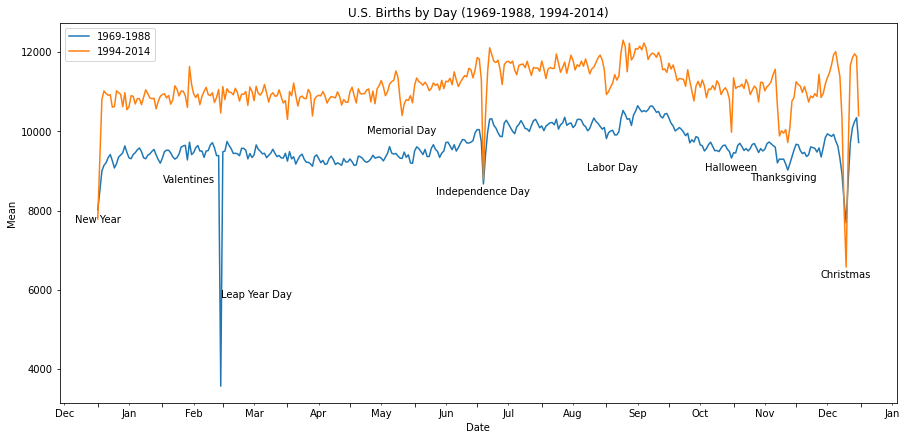

In [81]:
# Has trend changed? Compared the two periods
fig, ax = plt.subplots()

for i, df in enumerate([vpd, fte]):
    df['date'] = pd.to_datetime('2012-'+df['month'].astype(str)+'-'+df['day'].astype(str))
    data = df.groupby('date')['births'].mean().reset_index(name='mean').sort_values('date')
     
    sns.lineplot(x=data['date'], y=data['mean'], ax=ax)    
    
ax.text(datetime.datetime(2012, 1, 1), 7700, "New Year", ha='center')
ax.text(datetime.datetime(2012, 2, 14), 8700, "Valentines", ha='center')
ax.text(datetime.datetime(2012, 2, 29), 5800, "Leap Year Day", ha='left')
ax.text(datetime.datetime(2012, 5, 26), 9950, "Memorial Day", ha='center')
ax.text(datetime.datetime(2012, 7, 4), 8400, "Independence Day", ha='center')
ax.text(datetime.datetime(2012, 9, 4), 9000, "Labor Day", ha='center')
ax.text(datetime.datetime(2012, 10, 31), 9000, "Halloween", ha='center')
ax.text(datetime.datetime(2012, 11, 25), 8750, "Thanksgiving", ha='center')
ax.text(datetime.datetime(2012, 12, 25), 6300, "Christmas", ha='center')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator()) #force major ticks on a monthly time scale
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

ax.set(title='U.S. Births by Day (1969-1988, 1994-2014)', ylabel='Mean', xlabel='Date')
ax.legend(['1969-1988','1994-2014'])
plt.show()

Some biggest differences in the 21st Century:
- More births on Valentine's
- More births on Leap Day (even though both periods have 5 years) -- this is quite noticable compared to before
- Big drops on major holidays: New Year, Memorial, 4th July, Labor, Halloween, Thanksviging, and Christmas -- Americans take holidays more seriously

### Plot conceptions    

ValueError: day is out of range for month

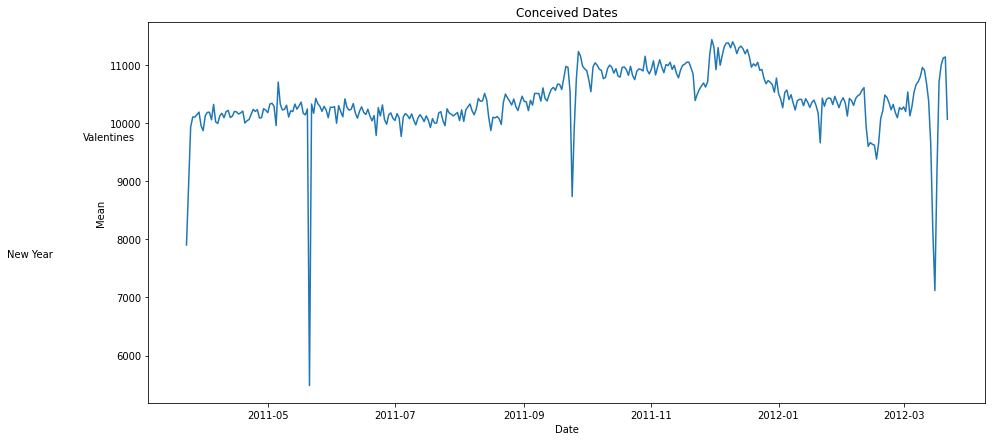

In [92]:
data = birth_df.groupby('date')['births'].mean().reset_index(name='mean').sort_values('date')
data['conceived_date'] = data['date'] - datetime.timedelta(days=284) #9 months 10 days

# Plot
ax = sns.lineplot(x=data['conceived_date'], y=data['mean'])
ax.set(title='Conceived Dates', ylabel='Mean', xlabel='Date')

# day labels
ax.text(datetime.datetime(2011, 1, 7), 7700, "New Year", ha='center')
ax.text(datetime.datetime(2011, 2, 14), 9700, "Valentines", ha='center')
ax.text(datetime.datetime(2011, 2, 29), 5800, "Leap Year Day", ha='left')
ax.text(datetime.datetime(2011, 5, 26), 9500, "Memorial Day", ha='center')
ax.text(datetime.datetime(2011, 7, 4), 8400, "Independence Day", ha='center')
ax.text(datetime.datetime(2011, 9, 4), 10000, "Labor Day", ha='center')
ax.text(datetime.datetime(2011, 10, 31), 9300, "Halloween", ha='center')
ax.text(datetime.datetime(2011, 11, 25), 8850, "Thanksgiving", ha='center')
ax.text(datetime.datetime(2011, 12, 25), 6800, "Christmas", ha='center')

# adjust x-axis
ax.xaxis.set_major_locator(mpl.dates.MonthLocator()) #force major ticks on a monthly time scale
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))
